<a href="https://colab.research.google.com/github/soyudea/proyecro_IA_2023_UltimaVesrsion/blob/main/proyecto_I_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#notebook_interface: "jupyterlab

In [ ]:
import pandas as pd
import numpy as np
import math
from seaborn import distplot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error, r2_score, mean_squared_error
from matplotlib.patches import split_path_inout
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot

from sklearn.svm import SVC
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

from sklearn.decomposition import PCA

Preparar el archivo test.csv para Realizar procesos de prediccion con los datos desconocidos por el modelo,
Preprocesamiento y transformación solo a numericos.

**Carga del dataset**
https://www.kaggle.com/competitions/playground-series-s3e2/data?select=train.csv

In [ ]:
#Se carga dataset obtenido de Kaggle de competencia
#==============================================================
datos = pd.read_csv('train.csv', sep=",")
datos_test = pd.read_csv('test.csv', sep=",")
df =datos.copy()
df_test=datos_test.copy()

In [ ]:
datos_test

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,15304.0,Female,57.0,0,0.0,Yes,Private,Rural,82.54,33.4,Unknown
1,15305.0,Male,70.0,1,0.0,Yes,Private,Urban,72.06,28.5,Unknown
2,15306.0,Female,5.0,0,0.0,No,children,Urban,103.72,19.5,Unknown
3,15307.0,Female,56.0,0,0.0,Yes,Govt_job,Urban,69.24,41.4,smokes
4,15308.0,Male,32.0,0,0.0,Yes,Private,Rural,111.15,30.1,smokes
...,...,...,...,...,...,...,...,...,...,...,...
6562975,7442271.0,159,0,2018-08-14 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6562976,7442272.0,160,0,2018-08-14 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6562977,7442273.0,161,0,2018-08-14 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6562978,7442274.0,161,1,2018-08-14 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#====================================== tenemos desbalance la clase minoritaria es el 4% del total=================================
print(datos.shape)
print(datos.value_counts(datos['stroke'], sort = True))


(15304, 12)
stroke
0    14672
1      632
dtype: int64


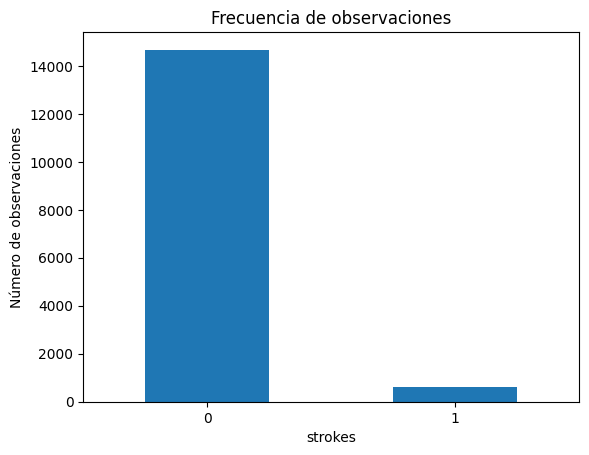

In [ ]:
cantidad_clases = datos.value_counts(datos['stroke'], sort = True)
cantidad_clases.plot(kind = 'bar', rot=0)
plt.title("Frecuencia de observaciones")
plt.xlabel("strokes")
plt.ylabel("Número de observaciones");

In [ ]:
# Tipo de cada columna
# ==============================================================================
# En pandas, el tipo "object" hace referencia a strings
# datos.dtypes
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [ ]:
# Número de datos ausentes por variable
# ==============================================================================
datos.isna().sum().sort_values()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

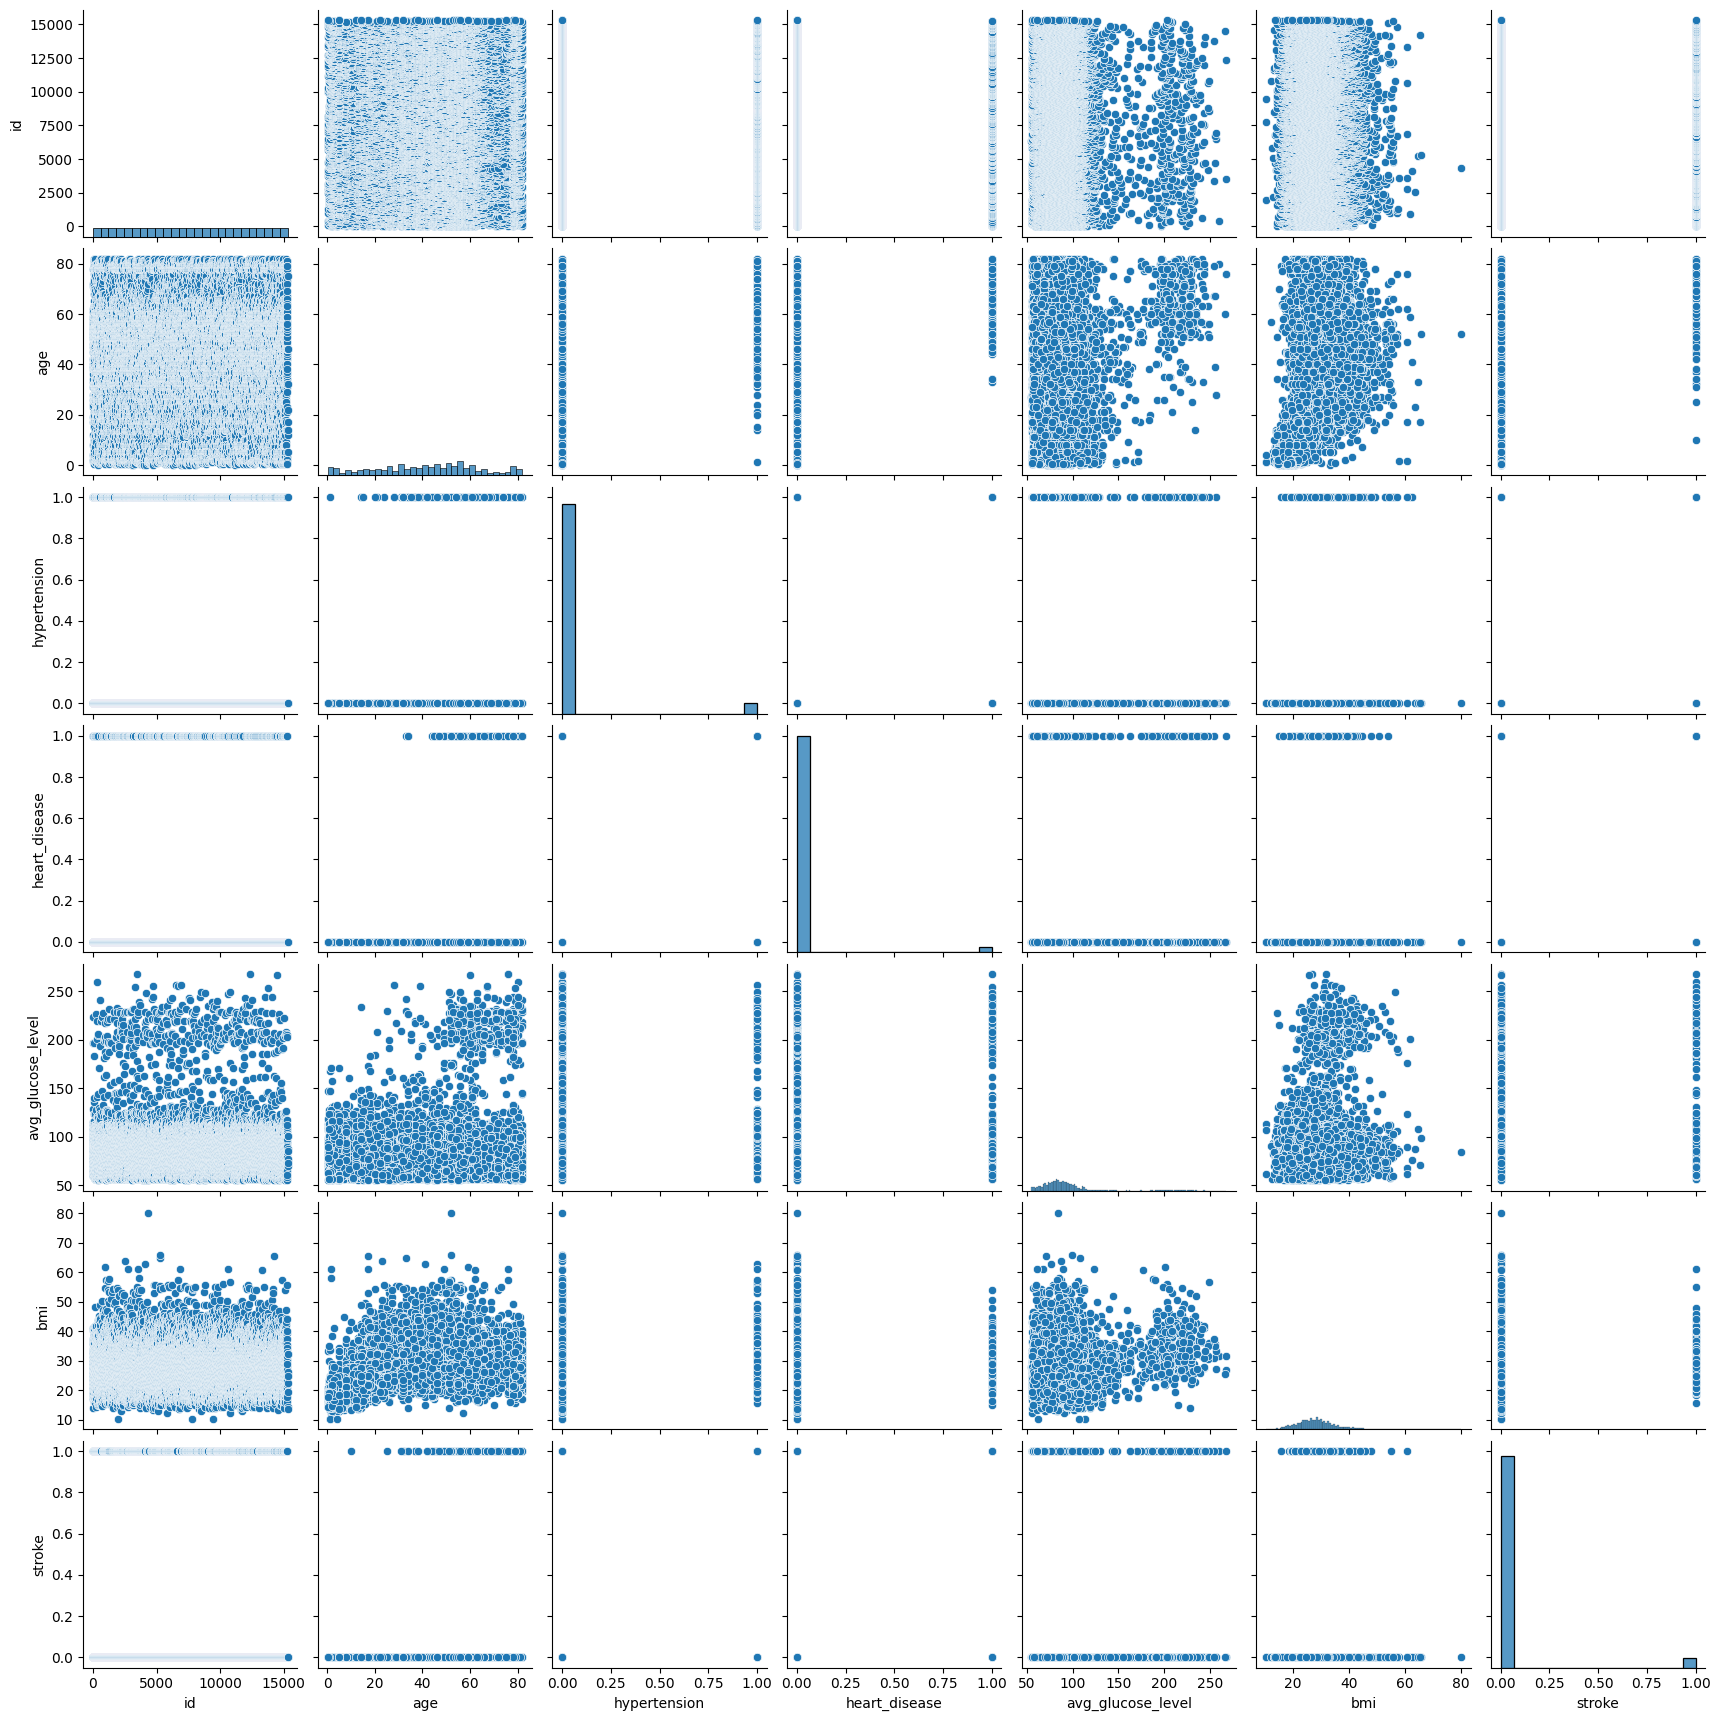

In [ ]:
import seaborn as sns
g = sns.pairplot(datos)

#Se agregan valores nulos al 5 % de las muestras en los campos age, avg_glucose_level

In [ ]:
#Se adiciona valores nulos al atributo age y avg_glucose_level
#=============================================================

#df =datos.copy()
lista=[]
porc_nulos =int(np.shape(df)[0]*5/100)   #Calculo de porcentaje de datos nulos
rango_df = np.shape(df)[0]

for i in range(porc_nulos):
    num_aleatprio = np.random.randint(rango_df) 
    lista.append(num_aleatprio)


for i in lista:
    df.at[i, "age"] = np.nan

lista=[]
rango_df = np.shape(df)[0]

for i in range(porc_nulos):
    num_aleatprio = np.random.randint(rango_df) 
    lista.append(num_aleatprio)


for i in lista:
    df.at[i, "avg_glucose_level"] = np.nan
    

In [ ]:
df.isna().sum().sort_values()

id                     0
gender                 0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
bmi                    0
smoking_status         0
stroke                 0
age                  741
avg_glucose_level    741
dtype: int64

**Se agregan valores promedios en aquellas muestras con valores nulos**

In [ ]:
#Se agregan valores promedios al atributo age cuando son nulos
#==================================================================

mean_age = df['age'].mean().astype(int) #Calculo media de las edades

for i in range(len(df)):
    if math. isnan(df.at[i, "age"]):
       df.at[i, "age"] = mean_age

In [ ]:
#Se agrega valores promedios al atributo avg_glucose_level cuando son nulos
#===============================================================================================
mean_avg_glucose_level = df['avg_glucose_level'].mean().astype(int) #Calculo media de las edades

for i in range(len(df)):
    if math. isnan(df.at[i, "avg_glucose_level"]):
       df.at[i, "avg_glucose_level"] = mean_avg_glucose_level



In [ ]:
# Número de datos ausentes por variable, En este punto hemos demostrado que podemos hacer cambios al dataSet cuando se rquiera
# =============================================================================================================================
datos.isna().sum().sort_values()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
# Se transforma el atributo age a valor entero, esto por que la edad aparece en la exploracion como valor floata
#===============================================================================================================

datos['age'] = datos['age'].astype('int64') 
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  int64  
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 1.4+ MB


In [ ]:
Age = datos['age'].astype('int')
rate = []
for i in range(Age.min(), Age.max()):
      rate.append(df[Age < i]['stroke'].sum() / len(df[Age < i]['stroke']) * 100.0)


<ipython-input-28-20ad977f6c47>:4: RuntimeWarning: invalid value encountered in long_scalars
  rate.append(df[Age < i]['stroke'].sum() / len(df[Age < i]['stroke']) * 100.0)


**Graficas que relacionan el ataque cardiaco con los factores de riesgo**

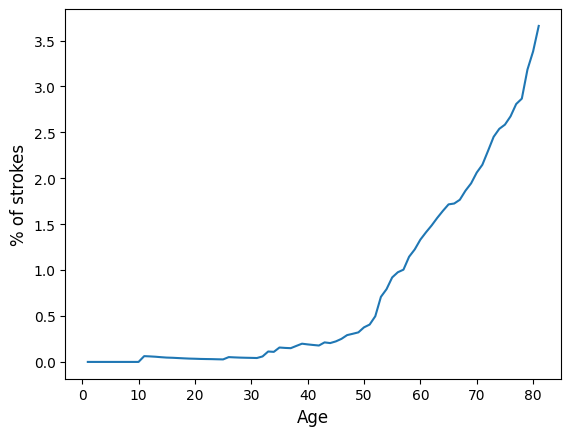

In [ ]:
plt.plot(rate)
plt.xlabel('Age', fontsize=12)
plt.ylabel('% of strokes', fontsize=12)
plt.show()

<ipython-input-19-0cdb257ac5c0>:4: RuntimeWarning: invalid value encountered in long_scalars
  rate.append(df[bmi < i]['stroke'].sum() / len(df[bmi < i]['stroke']) * 100.0)


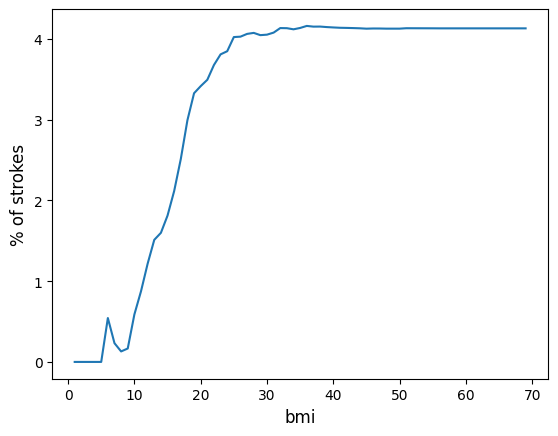

In [ ]:
bmi = datos['bmi'].astype(int)
rate = []
for i in range(bmi.min(), bmi.max()):
    rate.append(df[bmi < i]['stroke'].sum() / len(df[bmi < i]['stroke']) * 100.0)
plt.plot(rate)
plt.xlabel('bmi', fontsize=12)
plt.ylabel('% of strokes', fontsize=12)
plt.show()

<ipython-input-20-6b171b5b7504>:4: RuntimeWarning: invalid value encountered in long_scalars
  rate.append(df[glucosa < i]['stroke'].sum() / len(df[glucosa < i]['stroke']) * 100.0)


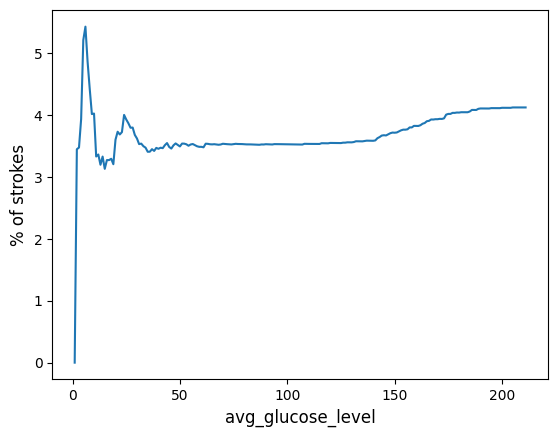

In [ ]:
glucosa = datos['avg_glucose_level'].astype(int)
rate = []
for i in range(glucosa.min(), glucosa.max()):
    rate.append(df[glucosa < i]['stroke'].sum() / len(df[glucosa < i]['stroke']) * 100.0)
plt.plot(rate)
plt.xlabel('avg_glucose_level', fontsize=12)
plt.ylabel('% of strokes', fontsize=12)
plt.show()

In [ ]:
#Se transforma campo numerico age a un atributo con valores categoricos, se discretisa
#========================================================================================================================================================

df = datos.copy()

edades = pd.cut(df['age'], bins = [0,10,20,40,np.inf], labels =['niño','joven','adulto','mayor'], include_lowest=True, retbins = True)
df['new_age'] = list(edades[0]) 

glucosa = pd.cut(df['avg_glucose_level'], bins = [0,100,125,np.inf], labels = ['normal', 'prediabetico','diabetico'], include_lowest=True, retbins=True)
df["avg_glucose"] = list(glucosa[0])

im = pd.cut(df['bmi'], bins = [18.5,24.9,25,29.9,np.inf], labels = ['low_weight', 'Healthy_weight','overweight','obesity'], include_lowest=True, retbins=True)
df['bmi_range'] = list(im[0])
df.shape

(15304, 15)

In [ ]:
#Se obtiene el tipo de los atributos
#======================================

for c in df.columns:
    print ("%20s"%c, df[c].dtype)
 

                  id int64
              gender object
                 age int64
        hypertension int64
       heart_disease int64
        ever_married object
           work_type object
      Residence_type object
   avg_glucose_level float64
                 bmi float64
      smoking_status object
              stroke int64
             new_age object
         avg_glucose object
           bmi_range object


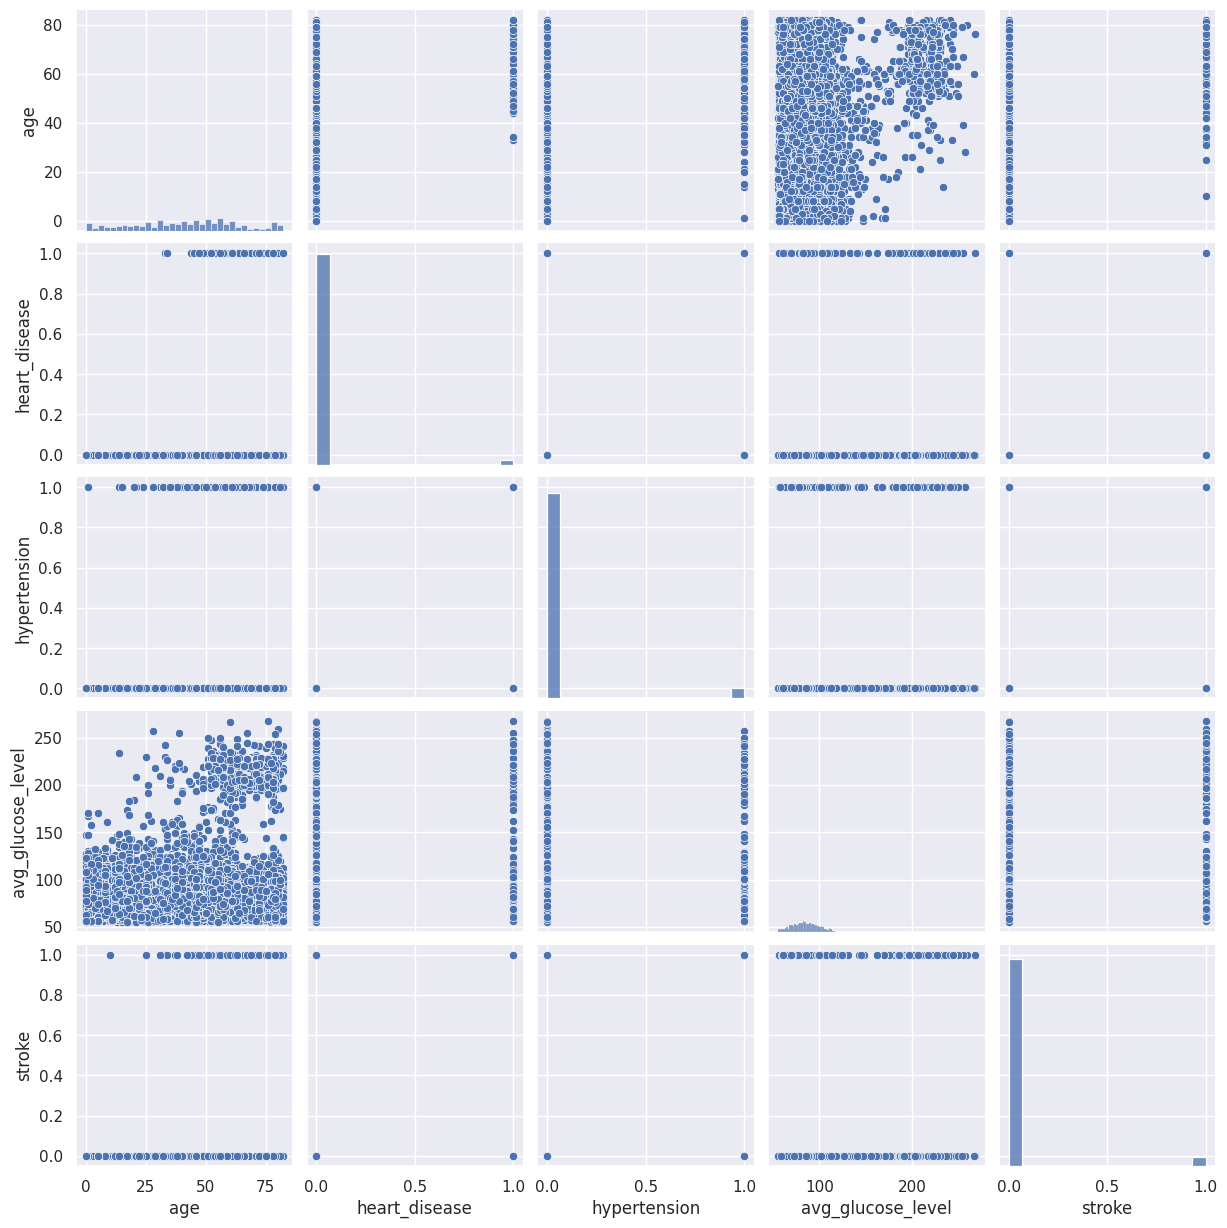

In [ ]:
cols = ['gender', 'age', 'heart_disease', 'hypertension', 'ever_married', 'avg_glucose_level','stroke']
#cols = np.unique(list(np.random.permutation(d._get_numeric_data().columns)[:5])+['SalePrice'])
sns.set()
sns.pairplot(datos[cols])

<ipython-input-13-a415e0e9dc3d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


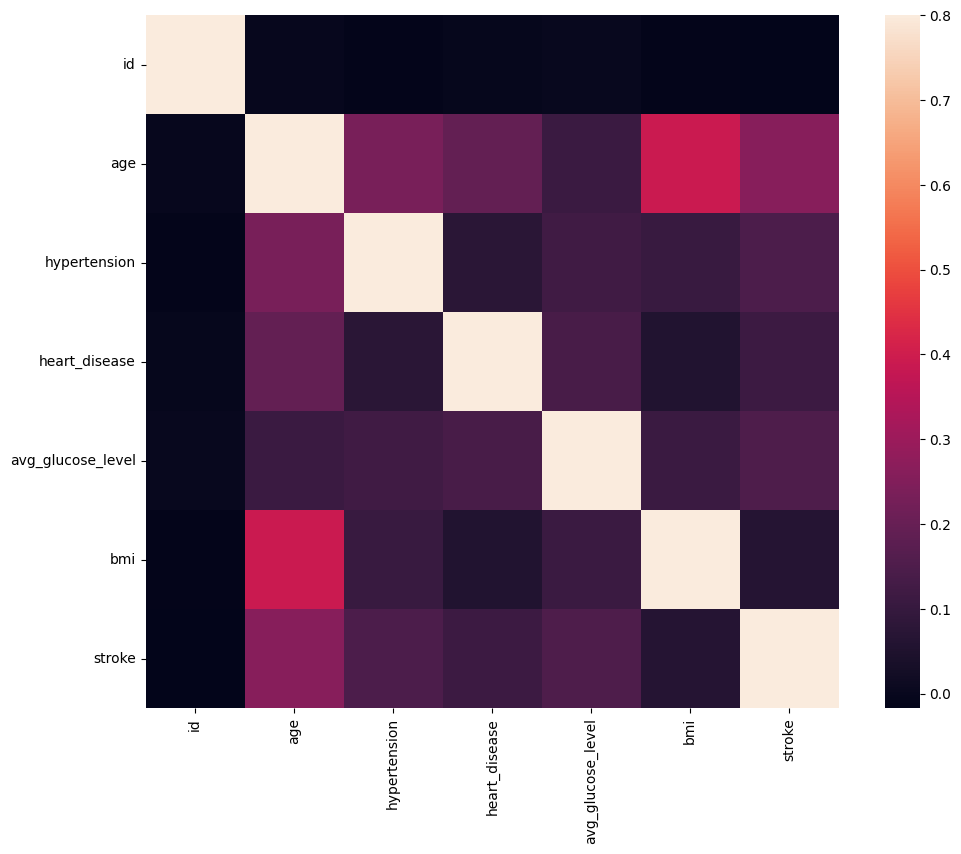

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Correlacion de variable con la variable objetivo o Stroke

In [ ]:
corrmat 

In [ ]:
#datos
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'new_age', 'avg_glucose', 'bmi_range'],
      dtype='object')

In [ ]:
#Se obtiene un dataset con todos sus atributos numéricos
#========================================================================================================================================================================================================================================
#Quitar la variable work_type

vnumericas = df.drop(["id","avg_glucose_level","age","bmi","new_age","avg_glucose","bmi_range","gender","ever_married","work_type","Residence_type","smoking_status", "bmi_range"],axis=1)#SE crea variable númerica sin las categoricas 
vcategoricas=df.filter(["new_age","avg_glucose","bmi_range","gender","ever_married","work_type","Residence_type","smoking_status", "bmi_range"]) 

#vnumericas = df.drop(["id","avg_glucose_level","age","bmi","new_age","avg_glucose","bmi_range","gender","ever_married","work_type","Residence_type","smoking_status", "bmi_range"],axis=1)#SE crea variable númerica sin las categoricas 
#vcategoricas=df.filter(["new_age","avg_glucose","bmi_range","gender","ever_married","smoking_status"]) 

cat_numerica=pd.get_dummies(vcategoricas,drop_first=False) 
df=pd.concat([cat_numerica,vnumericas],axis=1)
#datos = df
df.shape

(15304, 34)

In [ ]:
X = df[:len(df)]
y = df['stroke']
X = X.drop(columns=['stroke'])
X.columns
X.shape

(15304, 33)

In [ ]:
pca=PCA(n_components=30) 
pca.fit(X) #
X_pca=pca.transform(X)

**Generador de muestras sintéticas**

In [ ]:
#sampling_strategyfloat, str, dict or callable, default=’auto’

ros = RandomOverSampler(random_state=42, sampling_strategy=1.0)                          
Xres, yres = ros.fit_resample(X_pca, y)
Xtrain, Xtst, ytrain, ytst = train_test_split(Xres,yres, test_size=0.1) #Se toma el 90 % de los datos para Entrenar
print (Xtrain.shape, ytrain.shape, Xtst.shape, ytst.shape)
X=Xtrain
y=ytrain

(26409, 30) (26409,) (2935, 30) (2935,)


**Calculo pesos de la clase**

In [ ]:
def dar_peso_clase():
  Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, train_size = 0.8, random_state = 17)
  Number_Muestras_por_Clase = ytrain.value_counts()
  Number_Muestras_por_Clase = Number_Muestras_por_Clase.sort_index(axis = 0, ascending = True)
  Numero_de_Clases = len(Number_Muestras_por_Clase.index)
  Peso_por_Clase = len(ytrain)/(Numero_de_Clases*Number_Muestras_por_Clase)
  return Peso_por_Clase

In [ ]:
from numpy.ma.core import shape
X.shape

(26409, 30)

**Modelo  DecisionTreeClassifier**
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
#Entrenamiento del modelo  DecisionTreeClassifier con el 90% de las muestras
#=================================================================================================================
from sklearn.linear_model import LassoCV
from sklearn.metrics import roc_auc_score
kf = KFold(n_splits=20, random_state = True,shuffle=True)

preds = []
scores = []

model_params = {
    'precompute': 'auto',
    'fit_intercept': True,
    'max_iter': 100000,
    'verbose': False,
    'eps': 1e-04, 
    'n_alphas': 1000,
    'n_jobs': -1,
}
weight= dar_peso_clase()

#“gini”, “entropy”, “log_loss”}, default=”gini”
#max_depth=1,
#max_features, float or {“auto”, “sqrt”, “log2”}, default=None
classifier = DecisionTreeClassifier(criterion='gini',
                                    ccp_alpha=0.000001,
                                    min_samples_split=10,
                                    class_weight= {0: weight[0], 1: weight[1]},
                                    random_state=42)  #Falta parametrizar
X_test =0
y_test =0
for train_index, test_index in kf.split(X):

    #X_train, X_test = X_pca.iloc[train_index], X.iloc[test_index] #Linea de código cuando no usamos PCA
    X_train, X_test = X[train_index], X[test_index]  #linea de código para pca
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #modelo = LassoCV(**model_params)
    modelo = classifier.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    print()
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, digits =4, labels=[0,1]))
    preds.append(modelo.predict(X_test))
    s = roc_auc_score(y_test, modelo.predict(X_test))
    print(f'Best val auc: {s: .4f}')
    scores.append(s)
    print()


[[510 195]
 [ 56 560]]
              precision    recall  f1-score   support

           0     0.9011    0.7234    0.8025       705
           1     0.7417    0.9091    0.8169       616

    accuracy                         0.8100      1321
   macro avg     0.8214    0.8162    0.8097      1321
weighted avg     0.8268    0.8100    0.8092      1321

Best val auc:  0.8162


[[481 176]
 [ 66 598]]
              precision    recall  f1-score   support

           0     0.8793    0.7321    0.7990       657
           1     0.7726    0.9006    0.8317       664

    accuracy                         0.8168      1321
   macro avg     0.8260    0.8164    0.8154      1321
weighted avg     0.8257    0.8168    0.8154      1321

Best val auc:  0.8164


[[485 180]
 [ 60 596]]
              precision    recall  f1-score   support

           0     0.8899    0.7293    0.8017       665
           1     0.7680    0.9085    0.8324       656

    accuracy                         0.8183      1321
   macro a

Sin entrenar: ROC AUC=0.500
Algoritmo arbol de: ROC AUC=0.817



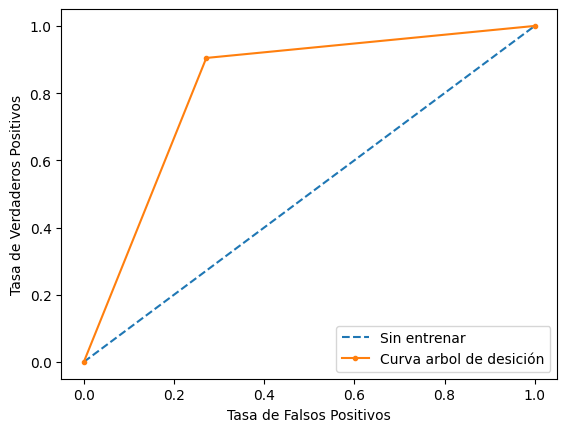

In [ ]:
#Curva ROC Arbol de desición

classes = classifier.predict(X_test) 
ns_probs = [0 for _ in range(len(y_test))]

ns_auc = roc_auc_score(y_test, ns_probs,average='weighted')
classifier_auc = roc_auc_score(y_test,classes,average='weighted')

#aps = average_precision_score(y_test, ns_probs)
#print("Average_presicion_score "+str(aps))

print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Algoritmo arbol de: ROC AUC=%.3f' % (classifier_auc))
classifier_probs = classes[:]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
classifier_fpr, classifier_tpr, _ = roc_curve(y_test, classifier_probs)
print()
pyplot.plot(classifier_fpr, classifier_tpr, marker='.', label='Curva arbol de desición')
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()
print()

**Verificación del modelo con el 10 % de los datos reservados para la prueba**

In [ ]:
#Entrenamiento del modelo  DecisionTreeClassifier
#=================================================================================================================
from sklearn.linear_model import LassoCV
from sklearn.metrics import roc_auc_score
kf = KFold(n_splits=5, random_state = True,shuffle=True)

preds = []
scores = []

model_params = {
    'precompute': 'auto',
    'fit_intercept': True,
    'max_iter': 100000,
    'verbose': False,
    'eps': 1e-04, 
    'n_alphas': 1000,
    'n_jobs': -1,
}
weight= dar_peso_clase()

#“gini”, “entropy”, “log_loss”}, default=”gini”
#max_depth=1,
#max_features, float or {“auto”, “sqrt”, “log2”}, default=None
classifier = DecisionTreeClassifier(criterion='gini',
                                    ccp_alpha=0.000001,
                                    min_samples_split=10,
                                    class_weight= {0: weight[0], 1: weight[1]},
                                    random_state=42)  #Falta parametrizar
X_test =0
y_test =0
for train_index, test_index in kf.split(Xtst):

    #X_train, X_test = X_pca.iloc[train_index], X.iloc[test_index] #Linea de código cuando no usamos PCA
    X_train, X_test = Xtst[train_index], Xtst[test_index]  #linea de código para pca
    y_train, y_test = ytst.iloc[train_index], ytst.iloc[test_index]

    #modelo = LassoCV(**model_params)
    modelo = classifier.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    print()
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, digits =4, labels=[0,1]))
    preds.append(modelo.predict(X_test))
    s = roc_auc_score(y_test, modelo.predict(X_test))
    print(f'Best val auc: {s: .4f}')
    scores.append(s)
    print()


[[207  90]
 [ 57 233]]
              precision    recall  f1-score   support

           0     0.7841    0.6970    0.7380       297
           1     0.7214    0.8034    0.7602       290

    accuracy                         0.7496       587
   macro avg     0.7527    0.7502    0.7491       587
weighted avg     0.7531    0.7496    0.7489       587

Best val auc:  0.7502


[[214  77]
 [ 56 240]]
              precision    recall  f1-score   support

           0     0.7926    0.7354    0.7629       291
           1     0.7571    0.8108    0.7830       296

    accuracy                         0.7734       587
   macro avg     0.7748    0.7731    0.7730       587
weighted avg     0.7747    0.7734    0.7731       587

Best val auc:  0.7731


[[228  76]
 [ 61 222]]
              precision    recall  f1-score   support

           0     0.7889    0.7500    0.7690       304
           1     0.7450    0.7845    0.7642       283

    accuracy                         0.7666       587
   macro a

**Maquina de soporte vectorial**
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

**Sintonización del modelo maquina de soporte vectorial**
https://scikit-learn.org/stable/modules/grid_search.html

In [ ]:
from sklearn.utils.fixes import loguniform
param_grid = {'kernel': ['rbf'], 'C':[1, 10, 100],
              'gamma': [1e-3, 1e-4] ,
              
              } 
#'tol':[1e-3, 1e-4],           
#  'decision_function_shape':['ovo', 'ovr']

svc = svm.SVC(gamma="scale")
clf = GridSearchCV(svc, param_grid, cv=5,n_jobs=2)
clf.fit(X, y) 
parametros = pd.concat([pd.DataFrame(clf.cv_results_["params"]),
                pd.DataFrame(clf.cv_results_["mean_test_score"],
                columns=["Accuracy"])],axis=1)
print(parametros)


In [ ]:
kf = KFold(n_splits=5, random_state = True,shuffle=True)
c=100
weight= dar_peso_clase()
X_test =0
y_test =0
svclassifier = SVC(C=c,kernel="rbf", gamma=0.0100,shrinking=False,tol=0.0010,
                   class_weight = {0: weight[0], 1: weight[1]},
                   decision_function_shape='ovo')
X_test = 0
y_test = 0
for train_index, test_index in kf.split(X):

    #X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    modelo = svclassifier.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    print()
    
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, digits =6, labels=[0,1],zero_division=1))
    s = roc_auc_score(y_test, modelo.predict(X_test))
    print(f'Best val auc: {s: .4f}')
    print()

Curva ROC Modelo maquina de soporte Vectorial SVC

Average_presicion_score 0.497046349591033
Sin entrenar: ROC AUC=0.500
Algoritmo SVC: ROC AUC=0.731



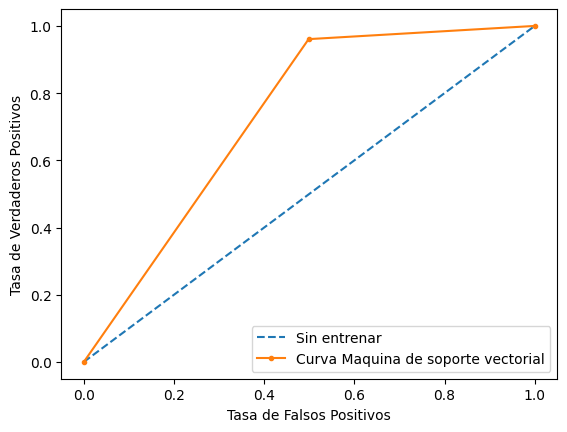

In [ ]:
#Curva ROC

classes = svclassifier.predict(X_test)
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs,average='weighted')
svclassifier_auc = roc_auc_score(y_test,classes,average='weighted')
aps = average_precision_score(y_test, ns_probs)

print("Average_presicion_score "+str(aps))
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Algoritmo SVC: ROC AUC=%.3f' % (svclassifier_auc))
svclassifier_probs = classes[:]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
svclassifier_fpr, classifier_tpr, _ = roc_curve(y_test, svclassifier_probs)
print()
pyplot.plot(svclassifier_fpr, classifier_tpr, marker='.', label='Curva Maquina de soporte vectorial')
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()
print()

**Verificación del modelo con el 10% de los datos reservados para test**

In [ ]:
kf = KFold(n_splits=2, random_state = True,shuffle=True)
c=100
weight= dar_peso_clase()
X_test =0
Y_test =0
svclassifier = SVC(C=c,kernel="rbf", gamma=0.0100,shrinking=False,tol=0.0010,
                   class_weight = {0: weight[0], 1: weight[1]},
                   decision_function_shape='ovo')

for train_index, test_index in kf.split(Xtst):

    #X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    X_train, X_test = Xtst[train_index], Xtst[test_index]
    y_train, y_test = ytst.iloc[train_index], ytst.iloc[test_index]

    modelo = svclassifier.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    print()
    
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, digits =6, labels=[0,1],zero_division=1))
    s = roc_auc_score(y_test, modelo.predict(X_test))
    print(f'Best val auc: {s: .4f}')
    print()


[[354 370]
 [ 13 731]]
              precision    recall  f1-score   support

           0   0.964578  0.488950  0.648946       724
           1   0.663942  0.982527  0.792412       744

    accuracy                       0.739101      1468
   macro avg   0.814260  0.735739  0.720679      1468
weighted avg   0.812212  0.739101  0.721656      1468

Best val auc:  0.7357


[[377 353]
 [ 14 723]]
              precision    recall  f1-score   support

           0   0.964194  0.516438  0.672614       730
           1   0.671933  0.981004  0.797573       737

    accuracy                       0.749830      1467
   macro avg   0.818064  0.748721  0.735093      1467
weighted avg   0.817366  0.749830  0.735392      1467

Best val auc:  0.7487



**Modelo de clasificación random Forest**
Entrenamiento con el 90 % de los datos

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
#X = df[:len(df)]
#y = df['stroke']
#X = X.drop(columns=['stroke'])

weight = dar_peso_clase() 

kf = KFokf = KFold(n_splits=50, random_state = True,shuffle=True)

#class_weight = {0: Peso_por_Clase[0], 1: Peso_por_Clase[1]
#max_features{“sqrt”, “log2”, None}, int or float, default=”sqrt”
#  random_state=True,
#min_weight_fraction_leaf=0.00005,
#n_estimators=5,
#min_impurity_decrease=0.005,
# ccp_alpha=0.000001,
# max_features ="sqrt",
#  warm_start=True,
#  n_jobs=2,
X_test =0
Y_test =0
classifier = RandomForestClassifier(min_samples_split=10,
                                    ccp_alpha=0.000001,
                                    criterion='gini',
                                    class_weight = {0: weight[0], 1: weight[1]},
                                    random_state=True)

for train_index, test_index in kf.split(X):
    
    #Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
    Xtrain, Xtest = X[train_index], X[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    modelo = classifier.fit(Xtrain, ytrain)
    ypred = modelo.predict(Xtest)

    print()
    print(confusion_matrix(ytest, ypred))
    print(classification_report(ytest, ypred, digits =4, labels=[0,1]))
    s = roc_auc_score(ytest, modelo.predict(Xtest))
    print(f'Best val auc: {s: .4f}')
   


[[176  69]
 [ 30 254]]
              precision    recall  f1-score   support

           0     0.8544    0.7184    0.7805       245
           1     0.7864    0.8944    0.8369       284

    accuracy                         0.8129       529
   macro avg     0.8204    0.8064    0.8087       529
weighted avg     0.8179    0.8129    0.8108       529

Best val auc:  0.8064

[[181  73]
 [ 32 243]]
              precision    recall  f1-score   support

           0     0.8498    0.7126    0.7752       254
           1     0.7690    0.8836    0.8223       275

    accuracy                         0.8015       529
   macro avg     0.8094    0.7981    0.7987       529
weighted avg     0.8078    0.8015    0.7997       529

Best val auc:  0.7981

[[185  66]
 [ 24 254]]
              precision    recall  f1-score   support

           0     0.8852    0.7371    0.8043       251
           1     0.7937    0.9137    0.8495       278

    accuracy                         0.8299       529
   macro avg

**Curva ROC, RandomForest**


Sin entrenar: ROC AUC=0.500
Algoritmo RandomForest: ROC AUC=0.800




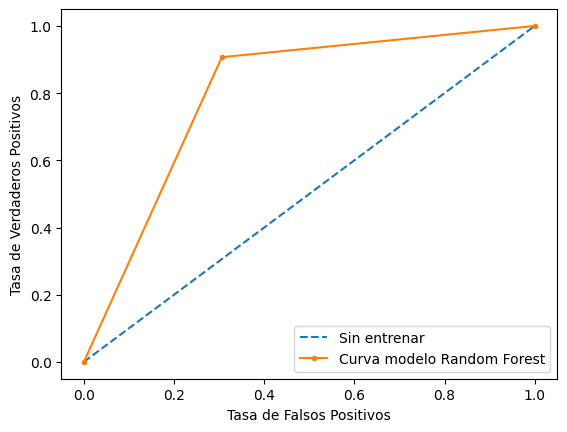

In [ ]:
classes = classifier.predict(Xtest)
ns_probs = [0 for _ in range(len(ytest))]
ns_auc = roc_auc_score(ytest, ns_probs,average='weighted')
classifier_auc = roc_auc_score(ytest,classes,average='weighted')
#aps = average_precision_score(ytest, ns_probs)
print()
#print("Average_presicion_score "+str(aps))
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Algoritmo RandomForest: ROC AUC=%.3f' % (classifier_auc))
print()
classifier_probs = classes[:]
ns_fpr, ns_tpr, _ = roc_curve(ytest, ns_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
classifier_fpr,classifier_tpr, _ = roc_curve(ytest, classifier_probs)
print()
pyplot.plot(classifier_fpr,classifier_tpr, marker='.', label='Curva modelo Random Forest')
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

**Verificación del modelo con el 10 % de los datos reservados para probar**

In [ ]:
#X = df[:len(df)]
#y = df['stroke']
#X = X.drop(columns=['stroke'])

weight = dar_peso_clase() 

kf = KFokf = KFold(n_splits=5, random_state = True,shuffle=True)

#class_weight = {0: Peso_por_Clase[0], 1: Peso_por_Clase[1]
#max_features{“sqrt”, “log2”, None}, int or float, default=”sqrt”
#  random_state=True,
#min_weight_fraction_leaf=0.00005,
#n_estimators=5,
#min_impurity_decrease=0.005,
# ccp_alpha=0.000001,
# max_features ="sqrt",
#  warm_start=True,
#  n_jobs=2,
classifier = RandomForestClassifier(min_samples_split=10,
                                    ccp_alpha=0.000001,
                                    criterion='gini',
                                    class_weight = {0: weight[0], 1: weight[1]},
                                    random_state=True)

for train_index, test_index in kf.split(Xtst):
    
    #Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
    X_train, X_test = Xtst[train_index], Xtst[test_index]
    y_train, y_test = ytst.iloc[train_index], ytst.iloc[test_index]
 
    modelo = classifier.fit(Xtrain, ytrain)
    ypred = modelo.predict(X_test)

    print()
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred, digits =4, labels=[0,1]))
    s = roc_auc_score(ytest, modelo.predict(Xtest))
    print(f'Best val auc: {s: .4f}')


[[214  83]
 [ 27 263]]
              precision    recall  f1-score   support

           0     0.8880    0.7205    0.7955       297
           1     0.7601    0.9069    0.8270       290

    accuracy                         0.8126       587
   macro avg     0.8240    0.8137    0.8113       587
weighted avg     0.8248    0.8126    0.8111       587

Best val auc:  0.8004

[[221  70]
 [ 25 271]]
              precision    recall  f1-score   support

           0     0.8984    0.7595    0.8231       291
           1     0.7947    0.9155    0.8509       296

    accuracy                         0.8382       587
   macro avg     0.8465    0.8375    0.8370       587
weighted avg     0.8461    0.8382    0.8371       587

Best val auc:  0.8004

[[236  68]
 [ 25 258]]
              precision    recall  f1-score   support

           0     0.9042    0.7763    0.8354       304
           1     0.7914    0.9117    0.8473       283

    accuracy                         0.8416       587
   macro avg